In [93]:
! pip install --upgrade scikit-learn

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.1)


# Data Preprocessing

In [94]:
import pandas as pd

df = pd.read_excel("Henderson Island Data.xlsx", sheet_name = "ALL")

df.head()

,Beach,Transect,Dim,Date,Item,Category,Size,Colour,Number,Notes
0,NE-low,1,30x2,2015-06-13,Fragment,Plastic,Macro,blue,99,NaN
1,NE-low,1,30x2,2015-06-13,Fragment,Plastic,Macro,white,422,NaN
2,NE-low,1,30x2,2015-06-13,Fragment,Plastic,Macro,black,143,NaN
3,NE-low,1,30x2,2015-06-13,Fragment,Plastic,Macro,yellow,76,NaN
4,NE-low,1,30x2,2015-06-13,Fragment,Plastic,Macro,red,32,NaN


In [95]:
nanColumns=df.columns[df.isna().any()]
print(*nanColumns.tolist(), sep = ", ")

Colour, Notes


In [96]:
df['Colour'] = df['Colour'].where(df['Colour'].notnull(), 'Unknown')

In [97]:
list_categories = list(df.columns.values)
list_categories.pop(list_categories.index("Date"))
list_categories.pop(list_categories.index("Number"))

for column in list_categories:
  df[column] = df[column].astype(str)
  df[column] = df[column].str.lower()
  df[column] = df[column].astype("category")


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Beach     887 non-null    category      
 1   Transect  887 non-null    category      
 2   Dim       887 non-null    category      
 3   Date      887 non-null    datetime64[ns]
 4   Item      887 non-null    category      
 5   Category  887 non-null    category      
 6   Size      887 non-null    category      
 7   Colour    887 non-null    category      
 8   Number    887 non-null    int64         
 9   Notes     887 non-null    category      
dtypes: category(8), datetime64[ns](1), int64(1)
memory usage: 25.8 KB


In [98]:
df = df.drop(columns=['Date','Notes','Beach', 'Number'])

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Transect  887 non-null    category
 1   Dim       887 non-null    category
 2   Item      887 non-null    category
 3   Category  887 non-null    category
 4   Size      887 non-null    category
 5   Colour    887 non-null    category
dtypes: category(6)
memory usage: 8.7 KB


In [100]:
cat_cols = df.select_dtypes(include=['category', object])
for column in cat_cols.columns:
     print("\n" + column)
     print(cat_cols[column].value_counts())


Transect
2        283
1        177
3        161
q2ht      40
q5nht     39
q5ht      37
q2nht     35
q1ht      22
q6ht      20
q6nht     17
q4nht     15
q3ht      12
q3nht     11
q4ht       9
q1nht      9
Name: Transect, dtype: int64

Dim
30x7         258
30x2         202
5cm          148
10cm         118
10x2          81
10x7          79
10+c842x7      1
Name: Dim, dtype: int64

Item
fragment                        279
fishing-rope                    102
nurdle                           86
disposable-caps/lids             62
fishing-crate                    42
fishing-strapping                37
disposable-bottle-plastic        30
glass                            30
net                              24
melted                           23
fishing-line                     23
fishing-buoy-plastic             17
disposable-plastic bag           14
unusual items                    13
bucket                           13
fencing                           9
pipe                              9


In [101]:
print("¿Hay valores faltantes? ->", df.isnull().values.any())

¿Hay valores faltantes? -> False


In [102]:
transect = df['Transect']
df = df.drop(columns=['Transect'])
df = df.join(transect)

df.head()

,Dim,Item,Category,Size,Colour,Transect
0,30x2,fragment,plastic,macro,blue,1
1,30x2,fragment,plastic,macro,white,1
2,30x2,fragment,plastic,macro,black,1
3,30x2,fragment,plastic,macro,yellow,1
4,30x2,fragment,plastic,macro,red,1


In [103]:
final_data = df[np.logical_or(np.logical_or(df['Transect']=="1", df['Transect']=="2"), df['Transect']=="3")]
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621 entries, 0 to 839
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dim       621 non-null    category
 1   Item      621 non-null    category
 2   Category  621 non-null    category
 3   Size      621 non-null    category
 4   Colour    621 non-null    category
 5   Transect  621 non-null    category
dtypes: category(6)
memory usage: 11.8 KB


In [67]:
data.to_csv("dataset.csv")

# Algorithm

In [105]:

transect = final_data["Transect"]
transect.reset_index(drop=True, inplace=True)
df=final_data.drop(['Transect'], axis=1)

cat_cols = df.select_dtypes(include=["category", object])

one = OneHotEncoder(drop='if_binary')
data = one.fit_transform(cat_cols.to_numpy()).toarray()
cat_cols = pd.DataFrame(one.transform(cat_cols).toarray())

df = cat_cols.join(transect)

In [106]:

dataset = df.to_numpy()

np.random.shuffle(dataset)

X = dataset[:,:-1]
y = dataset[:,-1]

indice = int(0.8*dataset.shape[0])

X_train = X[:indice, :]
y_train = y[:indice]

X_test = X[indice:, :]
y_test = y[indice:] 

In [107]:
from sklearn.ensemble import RandomForestClassifier as RFClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as DTClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier as SGDClf
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier as MLPClf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

Now, we are going to test the different classifiers

### Random Forest

In [108]:
clf = RFClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

print("Precision:", accuracy_score(y_test, clf.predict(X_test)))

cv = cross_val_score(clf, X, y, cv=10)
print("Accuracy:", cv.mean(), "+-", cv.std())

Precision: 0.56
Accuracy: 0.5071684587813621 +- 0.05967499752908219


### SVM

In [15]:
clf = svm.SVC()

clf.fit(X_train, y_train)

print("Precision:", accuracy_score(y_test, clf.predict(X_test)))

cv = cross_val_score(clf, X, y, cv=10)
print("Accuracy:", cv.mean(), "+-", cv.std())

Precision: 0.744
Accuracy: 0.6827444956477214 +- 0.019491507818024546


In [129]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':("linear", "poly", "rbf", "sigmoid"), 'C':[0.001, 0.01, 0.1, 1, 5, 10, 20]}
clf = svm.SVC()
grid = GridSearchCV(clf, parameters)
grid.fit(X, y)

params = grid.cv_results_["params"][grid.cv_results_["rank_test_score"].tolist().index(1)]
best_model = svm.SVC(C = params["C"], kernel = params["kernel"], probability=True)
print("Best Model:", best_model)
best_model.fit(X_train, y_train)

cv = cross_val_score(best_model, X, y, cv=10)
print("Accuracy:", cv.mean(), "+-", cv.std())

Best Model: SVC(C=1, kernel='sigmoid', probability=True)
Accuracy: 0.7213773681515618 +- 0.02738060228618204


### Logistic Regression

In [32]:
clf = LogisticRegression()

clf.fit(X_train, y_train)

print("Precision:", accuracy_score(y_test, clf.predict(X_test)))

cv = cross_val_score(clf, X, y, cv=10)
print("Accuracy:", cv.mean(), "+-", cv.std())

Precision: 0.696
Accuracy: 0.6747311827956989 +- 0.0453815672476724


### Decission Tree

In [33]:
clf = DTClassifier()

clf.fit(X_train, y_train)

total_depth = clf.get_depth()

print("Precision:", accuracy_score(y_test, clf.predict(X_test)))

cv = cross_val_score(clf, X, y, cv=10)
print("Accuracy:", cv.mean(), "+-", cv.std())

Precision: 0.464
Accuracy: 0.45094726062468 +- 0.04074108037843381


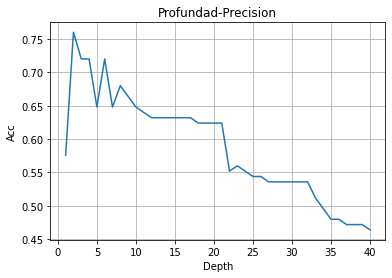

Mejor precision: 0.76 Profundidad: 2
Accuracy: 0.7133640552995393 +- 0.009622402312359946


In [35]:
import matplotlib
import matplotlib.pyplot as plt

scores_list = []
accs = []
depths = []

for d in range(1, total_depth):
  clf = DTClassifier(random_state=0, max_depth=d)
  clf.fit(X_train, y_train)

  acc = accuracy_score(y_test, clf.predict(X_test))

  accs += [acc]
  depths += [d]

  scores_list += [(acc, d, clf)]

best = max(scores_list)


# Data for plotting

fig, ax = plt.subplots()
ax.plot(depths, accs)

ax.set(xlabel='Depth', ylabel='Acc',
       title='Profundad-Precision')
ax.grid()

fig.savefig("Profundad-Precision.png")
plt.show()

print("Mejor precision:", best[0], "Profundidad:", best[1])

clf = best[2]

cv = cross_val_score(clf, X, y, cv=10)
print("Accuracy:", cv.mean(), "+-", cv.std())

In [54]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':("gini", "entropy"),'splitter':("best", "random"), 'max_depth':list(range(1, 20)), 'max_features':("auto", "sqrt", "log2", None)}
clf = DTClassifier()
grid = GridSearchCV(clf, parameters)
grid.fit(X, y)

params = grid.cv_results_["params"][grid.cv_results_["rank_test_score"].tolist().index(1)]
best_model = DTClassifier(criterion = params["criterion"], splitter = params["splitter"], max_depth = params["max_depth"], max_features = params["max_features"])
print("Best Model:", best_model)
best_model.fit(X_train, y_train)

cv = cross_val_score(best_model, X, y, cv=10)
print("Accuracy:", cv.mean(), "+-", cv.std())

Best Model: DecisionTreeClassifier(max_depth=2)
Accuracy: 0.7133640552995393 +- 0.009622402312359946


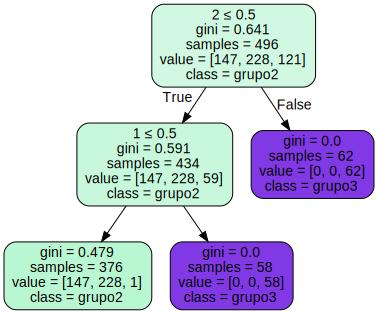

In [22]:
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("henderson")
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=df.columns[:-1],  
                     class_names=["grupo1", "grupo2","grupo3"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

### MLP

In [36]:
clf = MLPClf(hidden_layer_sizes=(256,256,256))

clf.fit(X_train, y_train)

print("Precision:", accuracy_score(y_test, clf.predict(X_test)))

cv = cross_val_score(clf, X, y, cv=10)
print("Accuracy:", cv.mean(), "+-", cv.std())

Precision: 0.536
Accuracy: 0.5040706605222735 +- 0.048799899585462325


### Naive Bayes

In [37]:
clf = GaussianNB()

clf.fit(X_train, y_train)

print("Precision:", accuracy_score(y_test, clf.predict(X_test)))

cv = cross_val_score(clf, X, y, cv=10)
print("Accuracy:", cv.mean(), "+-", cv.std())

Precision: 0.568
Accuracy: 0.5830005120327701 +- 0.02710288654844723


### KNN

In [40]:
clf = KNeighborsClassifier()

clf.fit(X_train, y_train)

print("Precision:", accuracy_score(y_test, clf.predict(X_test)))

cv = cross_val_score(clf, X, y, cv=10)
print("Accuracy:", cv.mean(), "+-", cv.std())

Precision: 0.544
Accuracy: 0.5491807475678442 +- 0.03354898141526097


### SGD

In [41]:
clf = SGDClf()

clf.fit(X_train, y_train)

print("Precision:", accuracy_score(y_test, clf.predict(X_test)))

cv = cross_val_score(clf, X, y, cv=10)
print("Accuracy:", cv.mean(), "+-", cv.std())

Precision: 0.664
Accuracy: 0.6410138248847926 +- 0.04681220221390403


### Gaussian Process

In [55]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

clf = GaussianProcessClassifier()

clf.fit(X_train, y_train)

print("Precision:", accuracy_score(y_test, clf.predict(X_test)))

cv = cross_val_score(clf, X, y, cv=10)
print("Accuracy:", cv.mean(), "+-", cv.std())

Precision: 0.664
Accuracy: 0.6424219150025602 +- 0.04376054002384692


# Anthropogenic Debris Simulation

In [119]:
df = pd.read_excel("Henderson Island Data.xlsx", sheet_name = "Beach_Back")

df.head()

,Beach,Transect,Dim (m),Date,Item,Colour,Dist (m),Mass (kg),Number,Notes
0,North,1,20x2,2015-07-25,Fishing-Crate,green,0.5,2.00,1,NaN
1,North,1,20x2,2015-07-25,Fishing-Buoy-plastic,black,2.0,0.20,1,NaN
2,North,1,20x2,2015-07-25,Bucket,white,2.0,0.10,1,NaN
3,North,1,20x2,2015-07-25,Unusual item,red,2.5,0.10,1,Flower pot
4,North,1,20x2,2015-07-25,Bucket,white,2.4,0.02,1,NaN


In [120]:
df['Colour'] = df['Colour'].where(df['Colour'].notnull(), 'Unknown')

In [112]:
item_mass = {}

for instance in df.to_numpy():
  key = instance[4].lower() + "#" + instance[5].lower()
  if key in item_mass.keys():
    item_mass[key] += [instance[7]]
  else:
    item_mass[key] = [instance[7]]

for k, v in item_mass.items():
  item_mass[k] = np.mean(v)

print(item_mass)

{'fishing-crate#green': 0.6716666666666665, 'fishing-buoy-plastic#black': 0.2, 'bucket#white': 0.028333333333333335, 'unusual item#red': 0.1, 'unusual item#blue': 0.275, 'fishing-crate#blue': 0.4, 'disposable-bottle-plastic#white': 0.06636363636363639, 'fishing-strapping#black': 0.023, 'disposable-caps/lids#blue': 0.02125, 'disposable-caps/lids#green': 0.01, 'disposable-caps/lids#white': 0.021875, 'unusual item#white': 0.028000000000000004, 'disposable-bottle-glass#unknown': 0.65, 'unusual item#black': 0.11, 'fishing-rope#green': 0.025000000000000005, 'disposable-bottle-plastic#blue': 0.05, 'fishing-buoy-foam#yellow': 0.39, 'disposable-bottle-plastic#purple': 0.02, 'disposable-caps/lids#red': 0.01, 'net#black': 0.12000000000000001, 'fishing-rope#black': 0.08285714285714287, 'fragment#white': 0.016964285714285716, 'bucket#black': 0.2, 'foam#black': 0.125, 'fishing-rope#white': 0.16611111111111113, 'fragment#blue': 0.00911764705882353, 'fishing-crate#black': 0.01, 'fishing-rope#red': 0.0

### We store all of the items in a dictionary

In [121]:
all_data = pd.read_excel("Henderson Island Data.xlsx", sheet_name = "ALL")

all_data.head()

,Beach,Transect,Dim,Date,Item,Category,Size,Colour,Number,Notes
0,NE-low,1,30x2,2015-06-13,Fragment,Plastic,Macro,blue,99,NaN
1,NE-low,1,30x2,2015-06-13,Fragment,Plastic,Macro,white,422,NaN
2,NE-low,1,30x2,2015-06-13,Fragment,Plastic,Macro,black,143,NaN
3,NE-low,1,30x2,2015-06-13,Fragment,Plastic,Macro,yellow,76,NaN
4,NE-low,1,30x2,2015-06-13,Fragment,Plastic,Macro,red,32,NaN


In [122]:
all_data['Colour'] = all_data['Colour'].where(all_data['Colour'].notnull(), 'Unknown')

In [125]:
item_probs = {}

for instance in all_data.to_numpy():
  key = instance[4].lower() + "#" + instance[7].lower()
  if key in item_mass.keys():
    if key in item_probs.keys():
      item_probs[key] += [instance[8]]
    else:
      item_probs[key] = [instance[8]]

for k, v in item_probs.items():
  item_probs[k] = np.sum(v)/len(v)

print(item_probs)

{'fragment#blue': 166.73333333333332, 'fragment#white': 498.953125, 'fragment#black': 100.20930232558139, 'fragment#yellow': 62.57575757575758, 'fragment#red': 50.65714285714286, 'fragment#green': 72.34146341463415, 'disposable-plastic bag#white': 7.2, 'fishing-crate#blue': 3.75, 'fishing-rope#blue': 22.954545454545453, 'fishing-rope#white': 34.0, 'fishing-rope#black': 16.857142857142858, 'fishing-rope#yellow': 11.0, 'fishing-rope#green': 82.4074074074074, 'bucket#white': 2.111111111111111, 'disposable-caps/lids#blue': 10.818181818181818, 'disposable-caps/lids#white': 12.785714285714286, 'disposable-caps/lids#red': 5.1, 'disposable-caps/lids#green': 6.333333333333333, 'fishing-strapping#blue': 4.888888888888889, 'fishing-strapping#white': 40.785714285714285, 'disposable-bottle-plastic#green': 1.5, 'fencing#yellow': 19.666666666666668, 'fishing-crate#green': 3.375, 'fishing-crate#white': 10.916666666666666, 'fishing-crate#black': 6.125, 'disposable-plastic bag#blue': 4.0, 'net#blue': 14

In [126]:
total = sum(list(item_probs.values()))

for k, v in item_probs.items():
  item_probs[k] = v/total

print(item_probs)

{'fragment#blue': 0.11971022381459294, 'fragment#white': 0.35823544742147484, 'fragment#black': 0.07194768898260431, 'fragment#yellow': 0.044927776557946726, 'fragment#red': 0.036370519247719196, 'fragment#green': 0.05193930093827094, 'disposable-plastic bag#white': 0.005169413903229124, 'fishing-crate#blue': 0.002692403074598502, 'fishing-rope#blue': 0.016480770335421134, 'fishing-rope#white': 0.024411121209693087, 'fishing-rope#black': 0.012102992868671362, 'fishing-rope#yellow': 0.00789771568548894, 'fishing-rope#green': 0.059166388552905354, 'bucket#white': 0.001515723212366564, 'disposable-caps/lids#blue': 0.007767174930356891, 'disposable-caps/lids#white': 0.009179812387678702, 'disposable-caps/lids#red': 0.0036616681814539624, 'disposable-caps/lids#green': 0.004547169637099692, 'fishing-strapping#blue': 0.0035100958602173066, 'fishing-strapping#white': 0.029283088678014185, 'disposable-bottle-plastic#green': 0.0010769612298394007, 'fencing#yellow': 0.014120158346783256, 'fishing

In [135]:
final_data = final_data.drop(columns=['Transect'])

In [155]:
final_data.head()

def gen_debris(dataframe, transects,total_mass):

  acc_mass = {}

  items = {}
  

  for t in transects:
    acc_mass[t] = 0

  while max(acc_mass.values()) < total_mass:
    sample = np.random.choice(list(item_probs.keys()), p=list(item_probs.values()))
    item = sample.split("#")[0]
    colour = sample.split("#")[1]
    sample_instances = all_data[np.logical_or(all_data["Item"] == item, all_data["Colour"] == colour)].to_numpy()
    np.random.shuffle(sample_instances)

    # Seleccionamos solo las columnas categoricas
    d = dataframe.select_dtypes(include=["category", object])
    # Usamos OneHotEncoder para pasar las variables categoricas a númericas
    one = OneHotEncoder(drop='if_binary')
    data = one.fit_transform(d.to_numpy()).toarray()
    cat_cols = pd.DataFrame(one.transform(d).toarray())
    X = cat_cols.to_numpy()
    transect = np.random.choice([1,2,3], p=best_model.predict_proba([X[0]])[0])

    if transect in transects:
      acc_mass[transect] += item_mass[item + "#" + colour]
      print("Transect:", transect, "- Mass:", acc_mass[transect])
      if transect not in items.keys():
        items[transect] = []
      else:
        items[transect] += [(item, colour)]
  
  return items

print(gen_debris(final_data, [1], 5)[1])

Transect: 1 - Mass: 0.016964285714285716
Transect: 1 - Mass: 0.04196428571428572
Transect: 1 - Mass: 0.06696428571428573
Transect: 1 - Mass: 0.08392857142857144
Transect: 1 - Mass: 0.10089285714285715
Transect: 1 - Mass: 0.11001050420168068
Transect: 1 - Mass: 0.1269747899159664
Transect: 1 - Mass: 0.1409747899159664
Transect: 1 - Mass: 0.15497478991596642
Transect: 1 - Mass: 0.16409243697478995
Transect: 1 - Mass: 0.18909243697478995
Transect: 1 - Mass: 0.20309243697478996
Transect: 1 - Mass: 0.30684243697478997
Transect: 1 - Mass: 0.32084243697479
Transect: 1 - Mass: 0.32750910364145663
Transect: 1 - Mass: 0.34447338935574234
Transect: 1 - Mass: 0.5444733893557423
Transect: 1 - Mass: 0.5614376750700281
Transect: 1 - Mass: 0.5784019607843138
Transect: 1 - Mass: 0.5859019607843138
Transect: 1 - Mass: 0.5950196078431373
Transect: 1 - Mass: 0.6041372549019609
Transect: 1 - Mass: 0.6291372549019609
Transect: 1 - Mass: 0.6382549019607845
Transect: 1 - Mass: 1.089683473389356
Transect: 1 - 